In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

# Data management and descriptive statistics

In [2]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [3]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-13,24860.050781,24346.115234,24402.187500,24424.068359,22987346289,24424.068359
2022-08-14,24974.914062,24206.259766,24429.056641,24319.333984,22994133555,24319.333984
2022-08-15,25135.589844,23839.775391,24318.316406,24136.972656,35123501685,24136.972656


In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-13,24860.050781,24346.115234,24402.187500,24424.068359,22987346289,24424.068359
2022-08-14,24974.914062,24206.259766,24429.056641,24319.333984,22994133555,24319.333984
2022-08-15,25135.589844,23839.775391,24318.316406,24136.972656,35123501685,24136.972656
2022-08-16,24228.416016,23733.500000,24126.136719,23883.291016,27753685646,23883.291016
2022-08-17,24404.292969,23361.060547,23860.712891,23403.675781,30512175104,23403.675781


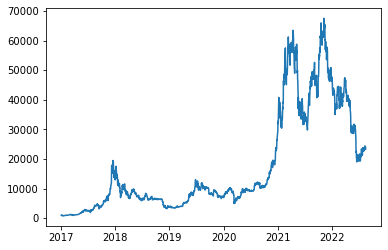

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2055 entries, 2017-01-01 to 2022-08-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2055 non-null   float64
 1   Low        2055 non-null   float64
 2   Open       2055 non-null   float64
 3   Close      2055 non-null   float64
 4   Volume     2055 non-null   int64  
 5   Adj Close  2055 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.4 KB


In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-13    0.000871
2022-08-14   -0.004288
2022-08-15   -0.007499
2022-08-16   -0.010510
2022-08-17   -0.020082
Name: R, Length: 2055, dtype: float64


In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [9]:
BTC= BTC.dropna()

In [10]:
sumret = BTC["R"].describe()
sumret

count    2054.000000
mean        0.002397
std         0.041315
min        -0.371695
25%        -0.015875
50%         0.002094
75%         0.020859
max         0.252472
Name: R, dtype: float64

In [11]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [12]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [13]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.001535817666431055
The daily variance of Bitcoin is  0.0017326714103720472
The daily standard deviation (volatility) of Bitcoin return is  0.041625369792616225
The daily median return of Bitcoin is  0.0020917722215703094


# Challenge: Histogram

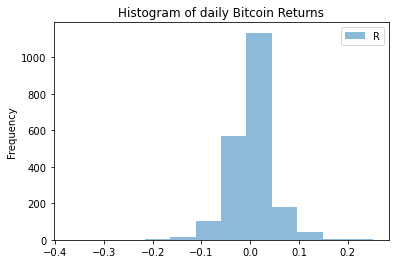

In [14]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

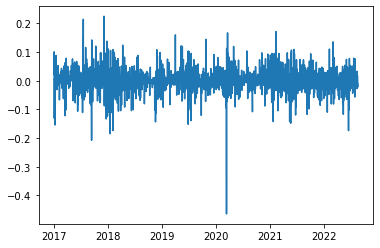

In [17]:
plot(BTC["r"])
show()

# Challenge Normal Distribution

We know that the column "r" of BTC cotains the historical cc returns of Bitcoin. 
We use the function random.normal to simulate random returns given the mean, standard deviation and size.

In [15]:
gen_values = np.random.normal(BTC["r"].mean(), BTC["r"].std(), BTC["r"].count())
print(gen_values)

[-0.03128191 -0.01277597 -0.07284994 ...  0.0084702   0.09787481
  0.02636626]


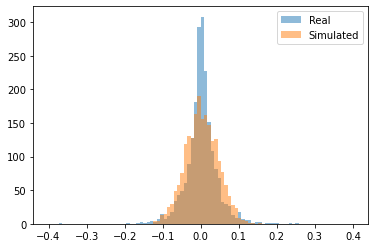

In [16]:
#Showing the real distribution of historical cc returns and simulated normal distribution
sim_bitcoin = pd.DataFrame(gen_values)
matplotlib.pyplot.hist(x= r_bitcoin, bins=90,alpha=0.5,range=(-0.4, 0.4),label="Real")
matplotlib.pyplot.hist(x=sim_bitcoin,bins=90,alpha=0.5,range=(-0.4, 0.4),label="Simulated")
matplotlib.pyplot.legend(loc='upper right')
matplotlib.pyplot.show()